<h1><center> Assignment 4 </center> </h1>

<h2 style="text-align:left;">
    Name: Sushovan Jena
    <span style="float:right;">
        Course: CS669
    </span>
</h2>
<h2 style="text-align:left;">
    Enroll No.: S20011
    <span style="float:right;">
         (Pattern Recognition)
    </span>
</h2>


<h1>Implementation of important functions</h1>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


### Create data set by combining the two class data
def two_class_data(train1, train2, test1, test2):
    trainX = np.concatenate((train1, train2), axis=0)
    trainY = np.array([0 for i in range(len(train1))] + [1 for i in range(len(train2))])
    testX = np.concatenate((test1, test2), axis=0)
    testY = np.array([0 for i in range(len(test1))] + [1 for i in range(len(test2))])
    return trainX, trainY, testX, testY

### Function for decision boundary plot
def decision_boundary_plot():
    x_min, x_max = testX[:, 0].min() - 1, testX[:, 0].max() + 1
    y_min, y_max = testX[:, 1].min() - 1, testX[:, 1].max() + 1
    h=0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    g_data = np.c_[xx.ravel(), yy.ravel()]
    
    predictedLabel = svc.predict(g_data)
    color = ['#EE6363', '#BCEE68', '#B2DFEE']
    predictedColor = [color[i] for i in predictedLabel]
    
    plt.scatter(g_data[:,0], g_data[:,1], s=5, color=predictedColor)
    plt.scatter(np.array(test1)[:,0], np.array(test1)[:,1], s=5, color='red', label='Class1')
    plt.scatter(np.array(test2)[:,0], np.array(test2)[:,1], s=5, color='green', label='Class2')
    plt.legend(bbox_to_anchor=(0.05, 1.15), loc='upper left', ncol=3)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    # plt.title('Constant density contour plot of Class1, Class2, and Class3 with its dataset')
    plt.savefig("decision_boundry_SVM_LS.png", dpi=300, bbox_inches="tight")
    plt.show()

### To calculate the confusion matrix and classification accuracy
def confusion_matrix(actual, predicted):
    n_label = len(np.unique(actual))
    cm = np.zeros((n_label, n_label))
    for i, j in zip(actual, predicted):
        cm[i][j] += 1
    ### For classification accuracy
    accuracy = np.sum(actual == predicted) * 100.0 / float(len(actual))
    return cm, accuracy


<h1><b>For Linearly Seperable Data</b></h1>

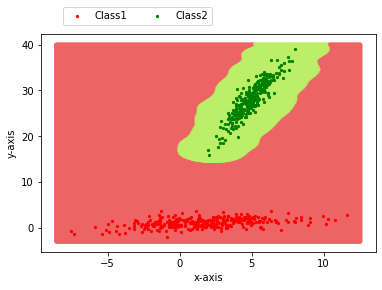

Confusion Matrix: [[300.   0.]
 [  0. 300.]]

Classification Accuracy: 100.0 %



In [8]:
#### Path of all class dataset 
f1 = r"D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment_04/ls_data/class1.txt"
f2 = r"D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment_04/ls_data/class2.txt"

### Devide the Class1 data into training and testing data
df = pd.read_csv(f1, header=None)
train1 = df.sample(frac=0.70, random_state=100)
test1 = df[~df.index.isin(train1.index)]
### Devide the Class2 data into training, validation, and testing data
df = pd.read_csv(f2, header=None)
train2 = df.sample(frac=0.70, random_state=100)
test2 = df[~df.index.isin(train2.index)]

#### For classification between Class1 and Class2 ####
trainX, trainY, testX, testY = two_class_data(train1, train2, test1, test2)

### Set SVM parameters
kernel_type, C_value, gamma_value = 'rbf', 1, 'auto'
# kernel_type, C_value, gamma_value = 'linear', 1, 'auto'
# kernel_type, C_value, gamma_value = 'poly', 1, 'auto'

### Call SVM from the library and train the model
svc = svm.SVC(kernel=kernel_type, C=C_value, gamma=gamma_value).fit(trainX, trainY)
### Predict the test data
predictions = svc.predict(testX)

### Call the 'decision_boundary_plot' function to plot the decision boundary
decision_boundary_plot()
    
### Call the confusion_matrix function
CM, Accuracy = confusion_matrix(testY, predictions)
print("Confusion Matrix: {}\n".format(CM))
print("Classification Accuracy: {} %\n".format(Accuracy))


<h1><b>For Non-Linearly Seperable Data</b></h1>

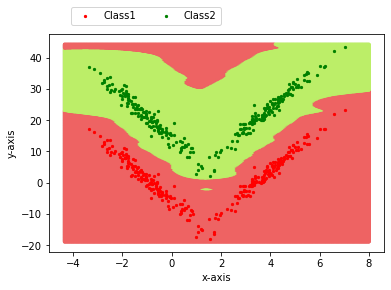

Confusion Matrix: [[300.   0.]
 [  0. 300.]]

Classification Accuracy: 100.0 %



In [9]:
#### Path of all class dataset 
f1 = r"D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment_04/nls_data/class1.txt"
f2 = r"D:/Sujeet_PhD/Course_Work/Pattern Recognition/Assignment/Assignment_04/nls_data/class2.txt"

### Devide the Class1 data into training and testing data
df = pd.read_csv(f1, header=None)
train1 = df.sample(frac=0.70, random_state=100)
test1 = df[~df.index.isin(train1.index)]
### Devide the Class2 data into training, validation, and testing data
df = pd.read_csv(f2, header=None)
train2 = df.sample(frac=0.70, random_state=100)
test2 = df[~df.index.isin(train2.index)]

#### For classification between Class1 and Class2 ####
trainX, trainY, testX, testY = two_class_data(train1, train2, test1, test2)

### Set SVM parameters
kernel_type, C_value, gamma_value = 'rbf', 1, 'auto'
# kernel_type, C_value, gamma_value = 'linear', 1, 'auto'
# kernel_type, C_value, gamma_value = 'poly', 1, 'auto'

### Call SVM from the library and train the model
svc = svm.SVC(kernel=kernel_type, C=C_value, gamma=gamma_value).fit(trainX, trainY)
### Predict the test data
predictions = svc.predict(testX)

### Call the 'decision_boundary_plot' function to plot the decision boundary
decision_boundary_plot()

### Call the confusion_matrix function
CM, Accuracy = confusion_matrix(testY, predictions)
print("Confusion Matrix: {}\n".format(CM))
print("Classification Accuracy: {} %\n".format(Accuracy))
